In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

hashmap=dict()
def init(n):
    k=math.ceil(1.5*math.log2(n))
    S=np.zeros(k,dtype='int32')
    return S

def insert(x,n):
    global hashmap
    #flag=0
    x=x.tolist()
    S=init(n)
    k=len(S)
    #print(math.log(x[1]))
    d=math.floor(math.log2(x[1])-2*math.log2(math.log(x[1])))
    for i in range(d):
        S[i]=1
    sample=np.random.binomial(1,1/(2**d),x[1])
    for i in range(x[1]):
        if sample[i]==1:
            j=d
            tempx=x
            tempx.append(i)
            tempx=tuple(tempx)
            if tempx not in hashmap.keys():
                while np.random.choice(range(0,2),1)[0]==0:
                    j+=1
                if(j>=k):
                    #flag+=1
                    j=k-1
                S[j]=1
                hashmap[tempx]=j
            else:
                j=hashmap[tempx]
                S[j]=1
    #print(flag)
    return S

def getSketch(data):
    n=len(data)
    S=init(n)
    i=0
    dd=dict()
    for x in data:
        tempS=insert(x,n)
        dd[i]=(getEstimate(tempS),x[1])
        i+=1
        S=(tempS==1)|(S==1)+0
    return S,dd

def getEstimate(S):
    k=len(S)
    r=0
    while r<k and S[r]==1 :
        r+=1
    return math.ceil((2**r)/0.775351)

def getRealResult(data):
    real=0
    temp=set()
    for x in data:
        i=tuple(x)
        if i not in temp:
            temp.add(i)
            real+=x[1]
    print(len(temp))
    return real


data=np.load('stream.npy')
S,dd=getSketch(data)
result=getEstimate(S)
real=getRealResult(data)
print(result)
print(real)



950
42263
50927


In [27]:
def generateData(n=1000,LL=10,UL=100):
    data=np.random.randint(LL,UL-1,(n,2))
    np.save('stream',data)
    return
generateData()

D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:578: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RankWarning: Polyfit may be poorly conditioned
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RankWarning: Polyfit may be poorly conditioned
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['SimSun'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


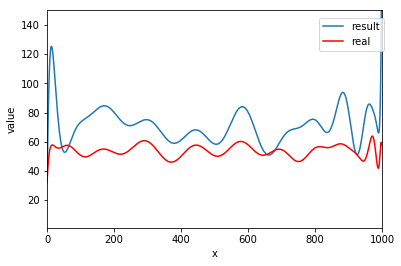

In [58]:
import matplotlib.pyplot as plt
import numpy as np


hashmap=dict()
def init(n):
    k=math.ceil(1.5*math.log2(n))
    S=np.zeros(k,dtype='int32')
    return S

def insert(x,n):
    global hashmap
    #flag=0
    x=x.tolist()
    S=init(n)
    k=len(S)
    #print(math.log(x[1]))
    d=math.floor(math.log2(x[1])-2*math.log2(math.log(x[1])))
    for i in range(d):
        S[i]=1
    sample=np.random.binomial(1,1/(2**d),x[1])
    for i in range(x[1]):
        if sample[i]==1:
            j=d
            tempx=x
            tempx.append(i)
            tempx=tuple(tempx)
            if tempx not in hashmap.keys():
                while np.random.choice(range(0,2),1)[0]==0:
                    j+=1
                if(j>=k):
                    #flag+=1
                    j=k-1
                S[j]=1
                hashmap[tempx]=j
            else:
                j=hashmap[tempx]
                S[j]=1
    #print(flag)
    return S

def getSketch(data):
    n=len(data)
    S=init(n)
    i=0
    dd=dict()
    for x in data:
        tempS=insert(x,n)
        dd[i]=(getEstimate(tempS),x[1])
        i+=1
        S=(tempS==1)|(S==1)+0
    return S,dd

def getEstimate(S):
    k=len(S)
    r=0
    while r<k and S[r]==1 :
        r+=1
    return math.ceil((2**r)/0.775351)

data=np.load('stream.npy')
S,dd=getSketch(data)
y1=list()
y2=list()

for i in dd.values():
    y1.append(i[0])
    y2.append(i[1])
x=range(len(y1))

parameter1 = np.polyfit(x, y1, 102) # n=1为一次函数，返回函数参数
f1 = np.poly1d(parameter1) # 拼接方程
parameter2 = np.polyfit(x, y2, 102) # n=1为一次函数，返回函数参数
f2 = np.poly1d(parameter2) # 拼接方程
plt.ylabel('value',fontproperties="SimSun")
plt.xlabel('x')
#ax1.set_title("20-FAT  n=1000K,b=2K,ε=0.05,δ=0.05", fontsize=14)
plt.plot(x, f1(x),label='result')
plt.plot(x, f2(x), 'r',label='real')
plt.axis([0, 1000, 1, 150])
plt.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.savefig('20191106-6.png', bbox_inches='tight')